In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from utils.eval import score
from utils.models import CentroidSMOTE
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/adult/adult.csv"
train_df = pd.read_csv(Train_path, header = 0)
print("done")

done


In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 6, dtype('O'): 9}


In [6]:
train_df = train_df.replace('?', np.NaN)

In [7]:
num_col = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [8]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 6, dtype('O'): 9}


In [9]:
for col in num_col:
    train_df[col] = pd.to_numeric(train_df[col], errors="coerce") 

In [10]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 6, dtype('O'): 9}


In [11]:
for col in train_df.columns:
    if 'int' in train_df[col] or 'float' in train_df[col]:
        train_df[col] = train_df[col].fillna(train_df[col].mean())
    else:
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)

In [12]:
print(train_df.isna().sum().sum())

0


In [13]:
print(train_df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [14]:
label_encoder = LabelEncoder()
i = 'income'
train_df[i] = label_encoder.fit_transform(train_df[i])    

In [15]:
train_df = pd.get_dummies(train_df)

In [16]:

scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
y_train = train_df['income']
y_test = test_df['income']
X_train = train_df.drop(['income'], axis = 1)
X_test = test_df.drop(['income'], axis = 1)

In [17]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [18]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.798158
Error Rate: 0.20184237461617194
Precision: 0.753004
Recall: 0.621102
F1-score: 0.639452
Selectivity: 0.621102
Balanced Accuracy: 0.621102
Geometric Mean: 0.621102


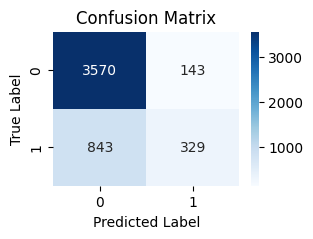

In [19]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({0: 33442, 1: 33442})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.688229
Error Rate: 0.31177072671443196
Precision: 0.620535
Recall: 0.650098
F1-score: 0.624688
Selectivity: 0.650098
Balanced Accuracy: 0.650098
Geometric Mean: 0.650098


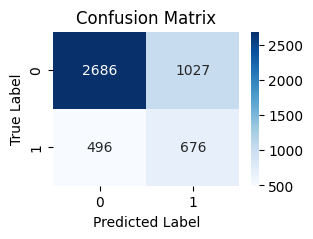

Resampled dataset shape Counter({0: 33442, 1: 33442})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.679632
Error Rate: 0.3203684749232344
Precision: 0.617143
Recall: 0.648530
F1-score: 0.619643
Selectivity: 0.648530
Balanced Accuracy: 0.648530
Geometric Mean: 0.648530


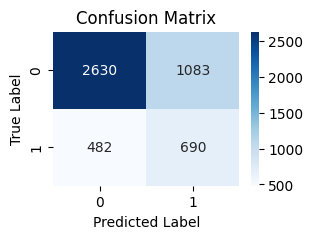

Resampled dataset shape Counter({0: 33442, 1: 33442})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.675128
Error Rate: 0.32487205731832136
Precision: 0.612625
Recall: 0.642939
F1-score: 0.614594
Selectivity: 0.642939
Balanced Accuracy: 0.642939
Geometric Mean: 0.642939


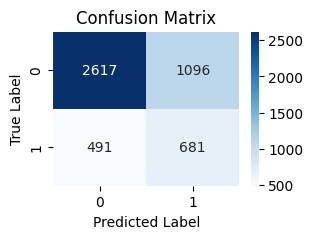

Resampled dataset shape Counter({0: 33442, 1: 33442})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.670829
Error Rate: 0.3291709314227226
Precision: 0.610206
Recall: 0.640695
F1-score: 0.611352
Selectivity: 0.640695
Balanced Accuracy: 0.640695
Geometric Mean: 0.640695


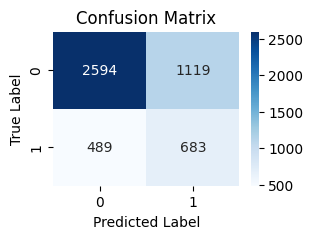

Resampled dataset shape Counter({0: 33442, 1: 33442})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.659775
Error Rate: 0.34022517911975436
Precision: 0.602912
Recall: 0.632840
F1-score: 0.602014
Selectivity: 0.632840
Balanced Accuracy: 0.632840
Geometric Mean: 0.632840


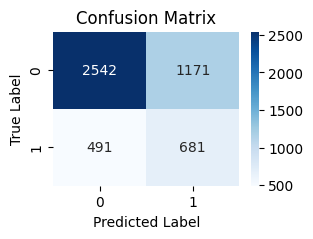

In [20]:
sm_list = []

for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.681883
Error Rate: 0.3181166837256909
Precision: 0.615875
Recall: 0.645340
F1-score: 0.619120
Selectivity: 0.645340
Balanced Accuracy: 0.645340
Geometric Mean: 0.645340


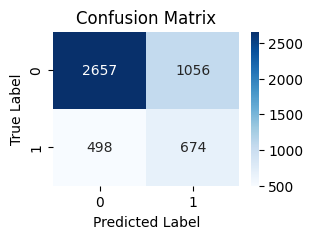

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.676561
Error Rate: 0.323439099283521
Precision: 0.613386
Recall: 0.643590
F1-score: 0.615626
Selectivity: 0.643590
Balanced Accuracy: 0.643590
Geometric Mean: 0.643590


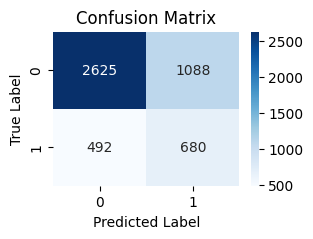

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.671238
Error Rate: 0.3287615148413511
Precision: 0.612422
Recall: 0.644176
F1-score: 0.613290
Selectivity: 0.644176
Balanced Accuracy: 0.644176
Geometric Mean: 0.644176


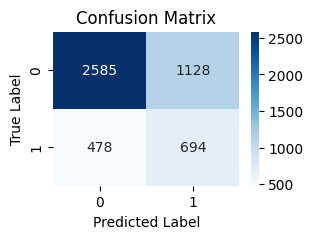

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.687001
Error Rate: 0.3129989764585466
Precision: 0.619691
Recall: 0.649290
F1-score: 0.623667
Selectivity: 0.649290
Balanced Accuracy: 0.649290
Geometric Mean: 0.649290


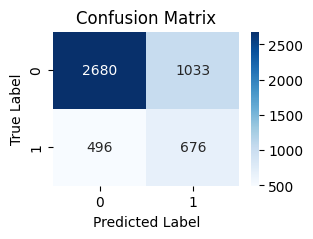

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.684954
Error Rate: 0.3150460593654043
Precision: 0.619658
Recall: 0.650279
F1-score: 0.623171
Selectivity: 0.650279
Balanced Accuracy: 0.650279
Geometric Mean: 0.650279


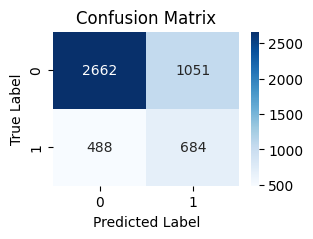

In [21]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)